# Load Packages

In [ ]:
# scikit-learn, scikit-image are needed
# If those packages are missed, then, install them by using the following command
# pip install scikit-learn scikit-image

import os

import sklearn.datasets
import sklearn.linear_model
import sklearn.svm
import sklearn.tree
import sklearn.ensemble
import sklearn.model_selection
import sklearn.metrics

import skimage.io
import skimage.transform
import skimage.color

import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


# Load Additional Packages (if you want to use other modules in Scikit Learn)

In [ ]:
# Load additional scikit learn packages! if you need
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Load Data Points (Do not modify the following block)

In [ ]:
image_size = 64
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

images = []
y = []
for i in labels:
    folderPath = os.path.join('./tumor_dataset/Training',i)
    # folderPath = os.path.join('/content/drive/MyDrive/final_project/tumor_dataset/Training', i)
    for j in os.listdir(folderPath):
        img = skimage.io.imread(os.path.join(folderPath,j),)
        img = skimage.transform.resize(img,(image_size,image_size))
        img = skimage.color.rgb2gray(img)
        images.append(img)
        y.append(i)
        
images = np.array(images)

X = images.reshape((-1, image_size**2))
y = np.array(y)

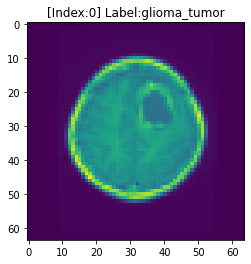

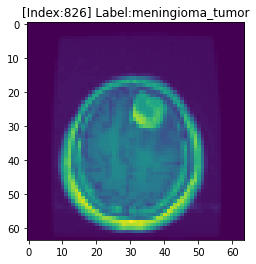

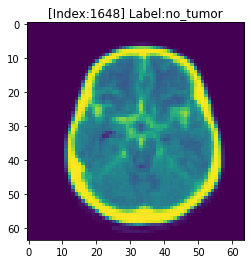

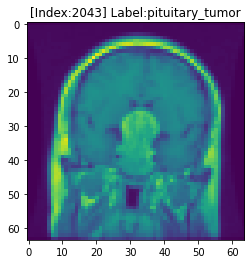

In [ ]:
j = 0
for i in range(len(y)):
    if y[i] in labels[j]:
        plt.imshow(images[i])
        plt.title("[Index:{}] Label:{}".format(i, y[i]))
        plt.show()
        j += 1
    if j >= len(labels):
        break

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

# Classification with Scikit Learn Library (Programming Assignment)
### Variable Explanation (Do not change variable names)
- 'X_train' is feature vectors of training dataset
- 'y_train' is target labels of training dataset
- 'X_test' is feature vectors of test dataset
- 'y_test' is target labels of test dataset
- 'y_pred' was initialized as zero vectors and fill 'y_pred' with predicted labels

### Find the best model and hyperparameter for face recognition

In [ ]:
model = sklearn.ensemble.VotingClassifier(estimators=[('clf1', Pipeline([('PCA', PCA(n_components=600, svd_solver='full')),
                                                                         ('SVM', sklearn.svm.SVC(C=1.4, gamma=0.9, probability=True, random_state=0))])),
                                                      ('clf2', GaussianProcessClassifier(kernel=1.0*RBF(1.0), random_state=0))], voting='soft')
# First, check accuracy by cross validation, and train model using all training set

### Print accuracy (do not modify the following block)

In [ ]:
# I recommend to skip this code because It takes a long time
print('Accuracy: %.2f' % (sum(cross_val_score(model, X, y, cv=5))/5))

Accuracy: 0.81


In [ ]:
model.fit(X, y)

VotingClassifier(estimators=[('clf1',
                              Pipeline(steps=[('PCA',
                                               PCA(n_components=600,
                                                   svd_solver='full')),
                                              ('SVM',
                                               SVC(C=1.4, gamma=0.9,
                                                   probability=True,
                                                   random_state=0))])),
                             ('clf2',
                              GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1),
                                                        random_state=0))],
                 voting='soft')